# CSV文件字段说明
#PassengerId：乘客ID编号
#Survived：是否获救，0没有，1获救
#Pclass：票面等级：1：一等座，2:二等座：3:三等座
#Name：姓名
#Sex：性别
#Age：年龄
#SibSp：兄弟姐妹、伴侣的数量
#Parch：父母子女的数量
#Ticket：票号
#Fare：票价
#Cabin：仓位
#Embarked：登船港口，C = Cherbourg, Q = Queenstown, S = Southampton

# 推测获救原因：
1.性别，先救女性后就男性
2.年龄，年龄越小获救可能越大
3.票面级别是否占有一定作用，性别相同的情况下，是否Pclass高的会优先

# 导入库

In [18]:
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

Populating the interactive namespace from numpy and matplotlib


# 导入csv文件

In [19]:
filename='/Users/wuchenyang/Downloads/P2_exam/titanic-data.csv'
titanic_df=pd.read_csv(filename)

In [20]:
titanic_df['Sex'].isnull().value_counts()

False    891
Name: Sex, dtype: int64

In [23]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       714 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


从上面可以看出Age、Cabin、Embarked有缺失

# 修正数据类型

In [22]:
titanic_df=titanic_df.dropna(subset=['Age'],inplace=False)
titanic_df['Embarked']=titanic_df['Embarked'].fillna('C')
titanic_df.count()

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          185
Embarked       714
dtype: int64

In [4]:
#修正年龄数据，删除age为NAN的空值
titanic_nonull_age=titanic_df.dropna(subset=['Age'],inplace=False)
#增加年龄区间
bins=[0,10,18,60,80]
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'],bins)

In [5]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Age_Group      714
dtype: int64

# 性别和是否获救的关系，从中可以看出，女性优先，获救的比例较大

性别与是否获救的乘客总量

In [6]:
titanic_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

是否获救的乘客数量图表

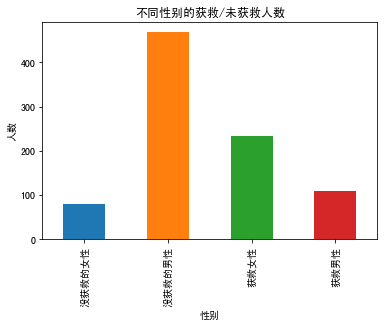

In [7]:
bar=titanic_df.groupby(['Survived','Sex'])['Survived'].count()
bar.plot(kind='bar')
plt.xlabel(U'性别')
plt.ylabel(U'人数')
plt.title(U"不同性别的获救/未获救人数")
plt.xticks((0,1,2,3),(u"没获救的女性",u"没获救的男性",u"获救女性",u"获救男性")) 
plt.show()

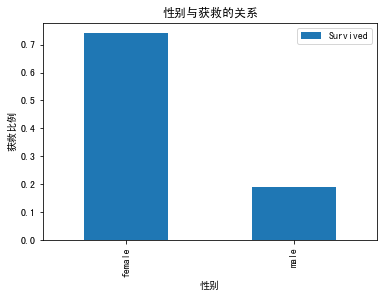

In [8]:
bar=titanic_df[['Survived','Sex']].groupby('Sex').mean()
bar.plot(kind='bar')
plt.xlabel(U'性别')
plt.ylabel(U'获救比例')
plt.title(U"性别与获救的关系")
plt.show()

# 判断年龄区间，从中可以看出，年龄越小获救可能性越大

In [9]:
titanic_df.groupby('Age_Group')['Survived'].count()

Age_Group
(0, 10]      64
(10, 18]     75
(18, 60]    553
(60, 80]     22
Name: Survived, dtype: int64

乘客年龄区间分布图

Text(0.5,1,u'\u6cf0\u5766\u5c3c\u514b\u53f7\u4e58\u5ba2\u7684\u5e74\u9f84\u5206\u5e03')

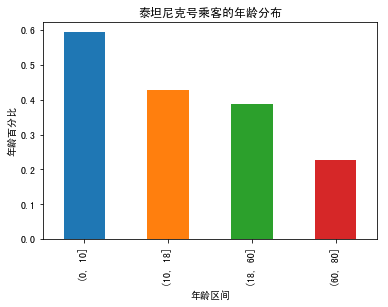

In [10]:
from matplotlib.font_manager import _rebuild
bar=titanic_df.groupby('Age_Group')['Survived'].mean()
bar.plot(kind='bar')
plt.xlabel(U'年龄区间')
plt.ylabel(U'年龄百分比')
plt.title(U'泰坦尼克号乘客的年龄分布')

In [11]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

获救人数与非获救人数，年龄所占比例

Text(0.5,1,u'\u5e74\u9f84\u548c\u83b7\u6551\u6bd4\u4f8b\u7684\u5173\u7cfb')

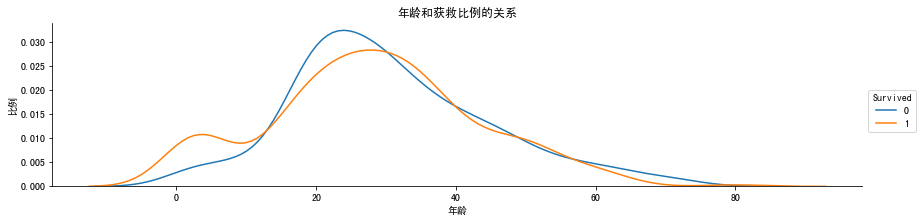

In [14]:
sns.FacetGrid(data=titanic_nonull_age,hue='Survived',aspect =4).map(sns.kdeplot,'Age').add_legend()
plt.xlabel(U'年龄')
plt.ylabel(U'比例')
plt.title(U'年龄和获救比例的关系')

# 票面级别是否占有一定作用，性别相同的情况下，是否Pclass高的会优先，从中可以看出，座位等级越高，占据一定优势


Text(0.5,1,u'\u7968\u9762\u7ea7\u522b\u548c\u83b7\u6551\u7684\u5173\u7cfb')

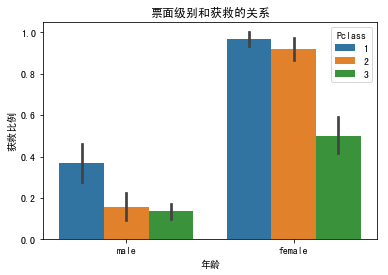

In [13]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df)
plt.xlabel(U'年龄')
plt.ylabel(U'获救比例')
plt.title(U'票面级别和获救的关系')

# 结论

由于此文件只给出了891名乘客的信息，如果891个信息是从所有乘客中随机抽取出来的，则以上分析有代表性，
如果不是随机抽取，以上结论不一定正确。